In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# ad[("all","mass")] == ad[("all","particle_mass")]

What is "deposit"?

In [4]:
import numpy as np
import yt
import sklearn
yt.funcs.mylog.setLevel(50)
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cross_validation import cross_val_score
from sklearn.cluster import KMeans
from sklearn.grid_search import GridSearchCV
DEBUG= True
def debug(s,n=""):
    if DEBUG:
	print s
	print n
debug("Loading Particle Data")
ds = yt.load("../ds14_scivis_0128_e4_dt04_1.0000")
ad = ds.all_data()
x = ad[("all","particle_position_x")]
y = ad[("all","particle_position_y")]
z = ad[("all","particle_position_z")]
debug("Creating train test split samples")
m = ad[("all","mass")]
idx = ad[("all","particle_index")]

Loading Particle Data

Creating train test split samples



In [5]:
train = []
test = []
N = 20#50
N_split = 4#10
for n in np.arange(N):
    if n >N_split:
        train.append([idx[n],m[n].in_cgs(),x[n].in_cgs(),y[n].in_cgs(),z[n].in_cgs()])
    elif n<N_split:
        test.append([idx[n],m[n].in_cgs(),x[n].in_cgs(),y[n].in_cgs(),z[n].in_cgs()])
train = np.array(train)
test = np.array(test)
debug("training set size : ", np.shape(train))
debug("testing  set size : ", np.shape(test))

# debug("Conducting KMeans on the training set")
# num_clusters=3
# clf = KMeans(n_clusters=num_clusters)
# clf.fit(train[2:])
# centers=clf.cluster_centers_
# labels=clf.predict(train[2:])

# debug("Hyperparameter tuning")
# k_range = range(1, len(train)/2)
# param_grid = dict(n_clusters=k_range)
# grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
# debug(grid)
# debug("Conducting hyperparameter grid search")
# grid.fit(train, labels)
# debug("Writing out grid scores and plotting")
# info =[]
# scores=[]
# for i in grid.grid_scores_:
#     info.append([i[0]["n_clusters"], i[1], i[2].std()])
#     #so i[2] is the list of results from cross validating 10 times (K folds, K=10)
#     scores.append(i[2])
# np.savetxt("info.txt",info,header="n_clusters         mean_score      std_score")
# np.savetxt("scores.txt",scores)

training set size : 
(15, 5)
testing  set size : 
(4, 5)


In [19]:
grid.scoring

'accuracy'

In [ ]:
def density(): 

In [17]:
grid.get_params

{'cv': 10,
 'error_score': 'raise',
 'estimator': KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
     n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
     verbose=0),
 'estimator__copy_x': True,
 'estimator__init': 'k-means++',
 'estimator__max_iter': 300,
 'estimator__n_clusters': 3,
 'estimator__n_init': 10,
 'estimator__n_jobs': 1,
 'estimator__precompute_distances': 'auto',
 'estimator__random_state': None,
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'fit_params': {},
 'iid': True,
 'loss_func': None,
 'n_jobs': 1,
 'param_grid': {'n_clusters': [1, 2, 3, 4, 5, 6]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'score_func': None,
 'scoring': 'accuracy',
 'verbose': 0}

In [7]:

# Explicit version of Grid Search 
k_range = range(1, 10)
# k_scores = []
densities =[]
for k in k_range:
    clf = KMeans(n_clusters=k)
    clf.fit(train[:,2:])
    centers=clf.cluster_centers_
    labels=clf.predict(test[:,2:]) #ignoring idx and mass 
    print centers
    print labels
#     scores = cross_val_score(knn, train, labels, cv=10, scoring='accuracy')
    
#     k_scores.append(scores.mean())
# print k_scores

[[  6.46000923e+05   2.75491975e+43  -1.30594310e+26  -1.36274958e+26
   -1.35179897e+26]]
[0 0]
[[  1.19883400e+06   2.75491975e+43  -1.37467750e+26  -1.33439350e+26
   -1.32724153e+26]
 [  5.45485818e+05   2.75491975e+43  -1.29344593e+26  -1.36790523e+26
   -1.35626395e+26]]
[0 0]
[[  7.99614000e+05   2.75491975e+43  -1.30758010e+26  -1.36974299e+26
   -1.33850277e+26]
 [  2.40532000e+05   2.75491975e+43  -1.27648493e+26  -1.36569992e+26
   -1.37757737e+26]
 [  1.19883400e+06   2.75491975e+43  -1.37467750e+26  -1.33439350e+26
   -1.32724153e+26]]
[0 0]
[[  5.99849500e+05   2.75491975e+43  -1.30228099e+26  -1.36051743e+26
   -1.39375199e+26]
 [  7.99614000e+05   2.75491975e+43  -1.30758010e+26  -1.36974299e+26
   -1.33850277e+26]
 [  1.19883400e+06   2.75491975e+43  -1.37467750e+26  -1.33439350e+26
   -1.32724153e+26]
 [  9.87000000e+02   2.75491975e+43  -1.25928756e+26  -1.36915492e+26
   -1.36679430e+26]]
[0 0]
[[  7.99652000e+05   2.75491975e+43  -1.30056631e+26  -1.37363668e+26
  

In [22]:
shape(train)

(399, 5)

In [20]:
shape(train[:,2:])

(399, 3)

In [26]:
import numpy as np
import yt
import sklearn
yt.funcs.mylog.setLevel(50)
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cross_validation import cross_val_score
from sklearn.cluster import KMeans
from sklearn.grid_search import GridSearchCV
DEBUG= True
def debug(s,n=""):
    if DEBUG:
	print s
	print n
debug("Loading Particle Data")
ds = yt.load("../ds14_scivis_0128_e4_dt04_1.0000")
ad = ds.all_data()
x = ad[("all","particle_position_x")]
y = ad[("all","particle_position_y")]
z = ad[("all","particle_position_z")]
debug("Creating train test split samples")
m = ad[("all","mass")]
idx = ad[("all","particle_index")]
train = []
test = []
N = 500
N_split = 100
for n in np.arange(N):
    if n >N_split:
        train.append([idx[n],m[n].in_cgs(),x[n].in_cgs(),y[n].in_cgs(),z[n].in_cgs()])
#         train.append([x[n].in_cgs(),y[n].in_cgs(),z[n].in_cgs()])
    elif n<N_split:
        test.append([idx[n],m[n].in_cgs(),x[n].in_cgs(),y[n].in_cgs(),z[n].in_cgs()])
#         test.append([x[n].in_cgs(),y[n].in_cgs(),z[n].in_cgs()])
train = np.array(train)
test = np.array(test)
debug("training set size : ", np.shape(train))
debug("testing  set size : ", np.shape(test))
# Explicit version of Grid Search 
k_range = range(1, 10)
# k_scores = []
densities =[]
for k in k_range:
    clf = KMeans(n_clusters=k)
#     clf.fit(train[2:])
#     clf.predict(test[2:]) #ignoring idx and mass 
    clf.fit(train[:,2:])
    centers=clf.cluster_centers_
    labels = clf.labels_
    print k,"clusters"
    print centers
    print labels

Loading Particle Data

Creating train test split samples

training set size : 
(399, 5)
testing  set size : 
(100, 5)
1 clusters
[[ -1.18149848e+26  -1.24972843e+26  -1.35022562e+26]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2 clus

In [27]:
centers

array([[ -1.10068447e+26,  -1.36750629e+26,  -1.28447840e+26],
       [ -1.27266595e+26,  -1.07403885e+26,  -1.38032059e+26],
       [ -1.13647052e+26,  -1.28811327e+26,  -1.38867427e+26],
       [ -1.36318695e+26,  -1.09602181e+26,  -1.36282459e+26],
       [ -1.11792851e+26,  -1.32955403e+26,  -1.35158956e+26],
       [ -1.08347622e+26,  -1.27246087e+26,  -1.31054980e+26],
       [ -1.19012678e+26,  -1.25610964e+26,  -1.25278094e+26],
       [ -1.31449025e+26,  -1.19635495e+26,  -1.36420499e+26],
       [ -1.15825301e+26,  -1.37913239e+26,  -1.35924459e+26]])

In [37]:
n=6
train[n,1] #mass

2.7549197512673419e+43

In [91]:
def compute_rcm(n_clusters,centroids):
    #since all the particles have the same mass, the center of mass is  just the arithmetic average weighted by the number of particles in each cluster 
#     print [mean(centroids[:,0]),mean(centroids[:,0]),mean(centroids[:,0])]
    numerator = 0
    n_tot = 0
    for i in np.arange(n_clusters):
        N = len(np.where(labels==i)[0]) #number of particles in each cluster
#         print "n_clusters:", i 
#         print "nuumber of particles in each cluster ", N
#         print "cluster center" , centroids[i]    
        numerator += centroids[i]*N 
#         print "numerator: " , numerator
        n_tot+=N
    rcm = numerator/n_tot
    return rcm
#         print train[np.where(labels==i)[0],1]
compute_rcm(8,centers)

array([ -1.18325286e+26,  -1.23996210e+26,  -1.34954495e+26])

testing if this makes sense. Just testing this looking at the x y  projection in 2D 

In [77]:
centers

array([[ -1.10068447e+26,  -1.36750629e+26,  -1.28447840e+26],
       [ -1.27266595e+26,  -1.07403885e+26,  -1.38032059e+26],
       [ -1.13647052e+26,  -1.28811327e+26,  -1.38867427e+26],
       [ -1.36318695e+26,  -1.09602181e+26,  -1.36282459e+26],
       [ -1.11792851e+26,  -1.32955403e+26,  -1.35158956e+26],
       [ -1.08347622e+26,  -1.27246087e+26,  -1.31054980e+26],
       [ -1.19012678e+26,  -1.25610964e+26,  -1.25278094e+26],
       [ -1.31449025e+26,  -1.19635495e+26,  -1.36420499e+26],
       [ -1.15825301e+26,  -1.37913239e+26,  -1.35924459e+26]])

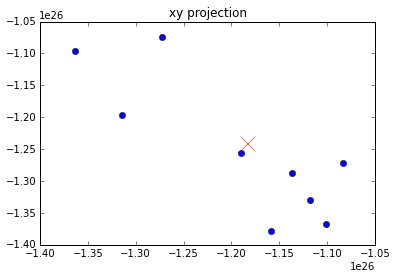

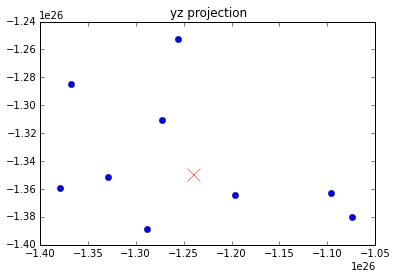

In [86]:
plt.figure()
plt.title("xy projection")
plt.plot(centers[:,0], centers[:,1],'o')
rcm = compute_rcm(8,centers)
plt.plot(rcm[0],rcm[1],"x", color = "red", markersize=13)
plt.figure()
plt.title("yz projection")
plt.plot(centers[:,1], centers[:,2],'o')
plt.plot(rcm[1],rcm[2],"x", color = "red", markersize=13)

So it turns out all the particles have the same mass (2.75491975e+43) , that simplifies matters by quite a bit 

In [94]:
def compute_avrg_rad(n_cluster,centroids):
    numerator = 0
    n_tot = 0
    for i in np.arange(n_cluster):
        numerator += np.linalg.norm(centroids[i]-compute_rcm(n_cluster,centroids))
    return numerator/n_cluster

1.4062843968876841e+25

So it looks like average radius doesn't encircle all the datapoint but that's okay because we are jsut computing a average density 

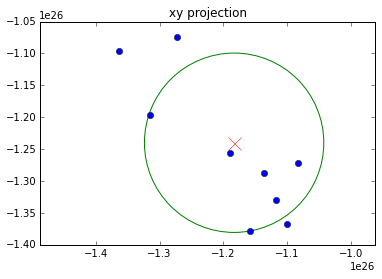

In [106]:
fig  = plt.figure()
plt.title("xy projection")
plt.plot(centers[:,0], centers[:,1],'o')
rcm = compute_rcm(8,centers)
plt.plot(rcm[0],rcm[1],"x", color = "red", markersize=13)
rad = compute_avrg_rad(8,centers)
circle1 = plt.Circle((rcm[0],rcm[1]),rad,color='g',fill=False)
fig.gca().add_artist(circle1)
axes().set_aspect('equal', 'datalim')

399

In [112]:
rad = compute_avrg_rad(8,centers)
volume = (4./3.*pi*rad**3)
mass = 2.75491975e43 * len(labels)
density = mass / volume

In [113]:
density

9.4356921775238172e-31

In [90]:
np.linalg.norm(np.array([1,2,3])) ==sqrt(14)

True